## Курсовой проект

### Задача:
##### Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.
### Наименование файлов с данными
##### course_project_train.csv - обучающий датасет
##### course_project_test.csv - тестовый датасет
### Описание датасета
* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Импорт модулей

In [11]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from pylab import rcParams
import seaborn as sns



%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Функции

In [12]:
def hists_descr(feature, bins = 60, log_x = False, log_y = False, grid = False):
    matplotlib.rcParams.update({'font.size' : 8})
    sns.set(rc={"figure.figsize": (12, 4)})
    plt.figure(figsize=(24,6))
    plt.subplot(121)
    feature.hist(bins=bins)
    plt.ylabel('Кол-во наблюдений')
    if log_x:
        plt.xscale(value = 'log')
    if log_y:
        plt.yscale(value = 'log')
    
    plt.subplot(122)
    ax1 = sns.distplot(feature)
    if log_x:
        ax1.set_xscale('log')
    if log_y:
        ax1.set_yscale('log')
    plt.show()

### Преобразование датасетов

In [13]:
test_df = pd.read_csv('course_project_test.csv')
test_df['Id'] = test_df.index.tolist()

## Анализ данных

In [14]:
test_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Id
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN,0
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0,1
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0,2
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0,3
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0,4


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [16]:
test_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Id
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000,2500.00000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860,1249.50000
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442,721.83216
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000,0.00000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000,624.75000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000,1249.50000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000,1874.25000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000,2499.00000


## Количественные данные

### Annual Income

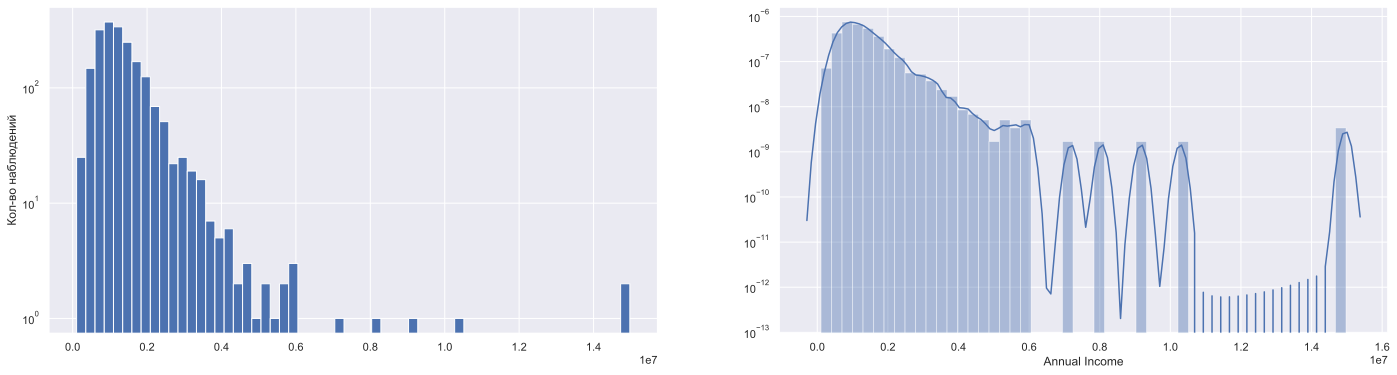

In [17]:
hists_descr(test_df['Annual Income'],log_y = True)

###### Ищем пропущенные значения

In [18]:
test_df['Annual Income'].isnull().value_counts()

False    1987
True      513
Name: Annual Income, dtype: int64

In [19]:
test_df['Purpose'].value_counts()

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
vacation                   3
educational expenses       3
wedding                    2
moving                     1
Name: Purpose, dtype: int64

Замена пропусков медиальным значением по цели кредита

In [20]:
purposes = test_df['Purpose'].value_counts().index.to_list()
for i in purposes:
    temp = test_df.loc[test_df['Purpose'] == i, 'Annual Income']
    test_df.loc[test_df['Annual Income'].isnull() & (test_df['Purpose'] == i), 'Annual Income'] = temp.median()
    if np.isnan(temp.median()):
        test_df.loc[test_df['Annual Income'].isnull(), 'Annual Income'] = test_df['Annual Income'].median()

In [21]:
test_df[test_df['Annual Income'] > 9999999]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Id
36,Home Mortgage,14934114.0,7 years,0.0,7.0,15.4,177298.0,0.0,NaN,0.0,other,Short Term,99770.0,57722.0,7218.0,746.0,36
194,Rent,14975610.0,5 years,0.0,5.0,44.3,155518.0,0.0,NaN,0.0,major purchase,Long Term,133386.0,103968.0,3369.0,738.0,194
1089,Home Mortgage,10275770.0,6 years,0.0,18.0,15.6,1242538.0,0.0,NaN,0.0,debt consolidation,Long Term,608432.0,115900.0,79038.0,746.0,1089


Изучив объекты, прихожу к решению, что их зарплаты не соответствуют действительности. Заменю их на медиальные по цели кредита

In [22]:
purposes = test_df['Purpose'].value_counts().index.to_list()
for i in purposes:
    temp = test_df.loc[test_df['Purpose'] == i, 'Annual Income']
    test_df.loc[(test_df['Annual Income'] > 9999999) & (test_df['Purpose'] == i), 'Annual Income'] = temp.median()

In [23]:
test_df[test_df['Annual Income'].isnull()]
# Все пропуски Annual Income заполнены

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Id


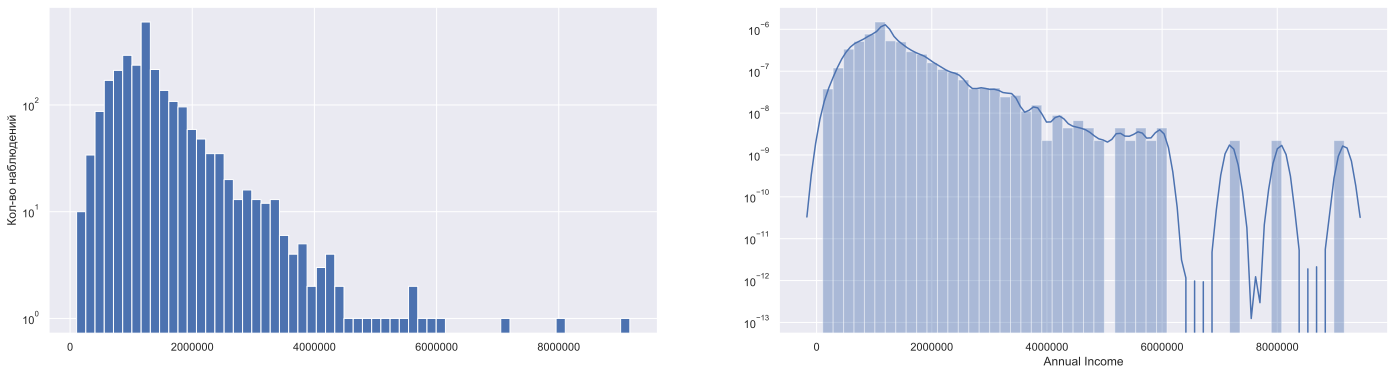

In [24]:
hists_descr(test_df['Annual Income'],log_y = True)

### Tax Liens

In [25]:
test_df['Tax Liens'].isnull().value_counts() # пропусков нет
test_df['Tax Liens'].value_counts()

0.0     2445
1.0       45
2.0        5
15.0       1
3.0        1
6.0        1
4.0        1
5.0        1
Name: Tax Liens, dtype: int64

### Number of Open Accounts

In [26]:
test_df['Number of Open Accounts'].isnull().value_counts() # пропусков нет
test_df['Number of Open Accounts'].value_counts()

9.0     245
8.0     223
10.0    218
11.0    211
12.0    204
6.0     183
13.0    178
7.0     176
14.0    159
5.0     106
15.0     97
16.0     81
17.0     66
4.0      63
18.0     52
19.0     46
20.0     37
21.0     29
3.0      29
22.0     26
23.0     17
27.0     10
24.0      9
2.0       7
30.0      6
25.0      6
26.0      5
28.0      3
33.0      2
48.0      1
31.0      1
1.0       1
36.0      1
29.0      1
34.0      1
Name: Number of Open Accounts, dtype: int64

### Years of Credit History

Пропусков нет, аномальных значений нет

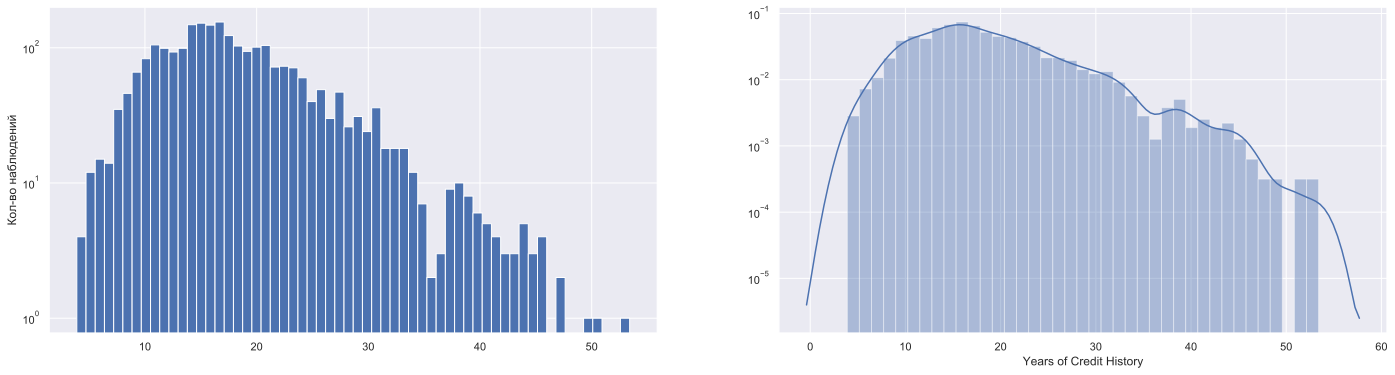

In [27]:
hists_descr(test_df['Years of Credit History'], log_y=True)

### Number of Credit Problems

In [28]:
test_df['Number of Credit Problems'].isnull().value_counts() # пропусков нет
test_df['Number of Credit Problems'].value_counts()

0.0     2177
1.0      280
2.0       29
3.0        7
5.0        4
15.0       1
4.0        1
7.0        1
Name: Number of Credit Problems, dtype: int64

### Maximum Open Credit

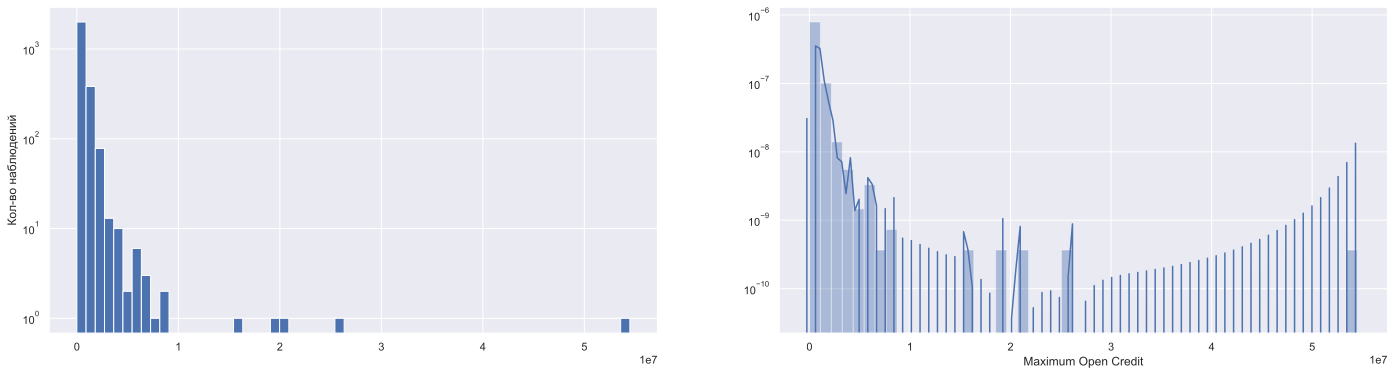

In [29]:
hists_descr(test_df['Maximum Open Credit'], log_y = True)

In [30]:
len(test_df[test_df['Maximum Open Credit'] == 0])

14

14 пропущенных значений. Попробуем подставить Current Loan Amount

In [31]:
test_df.loc[test_df['Maximum Open Credit'] == 0, 'Maximum Open Credit'] = \
test_df.loc[test_df['Maximum Open Credit'] == 0, 'Current Loan Amount']

Также на графике видим несколько аномально высоких значений

In [32]:
#train_df[train_df['Maximum Open Credit'] > 99999990].head(4)
len(test_df[test_df['Maximum Open Credit'] > 9000000])

6

Давайте примем эти ситуации за рефинансирование и тоже приравняем к  Current Loan Amount

In [33]:
test_df.loc[test_df['Maximum Open Credit'] > 9000000, 'Maximum Open Credit'] = \
test_df.loc[test_df['Maximum Open Credit'] > 9000000, 'Current Loan Amount']

Посмотрим на распределение

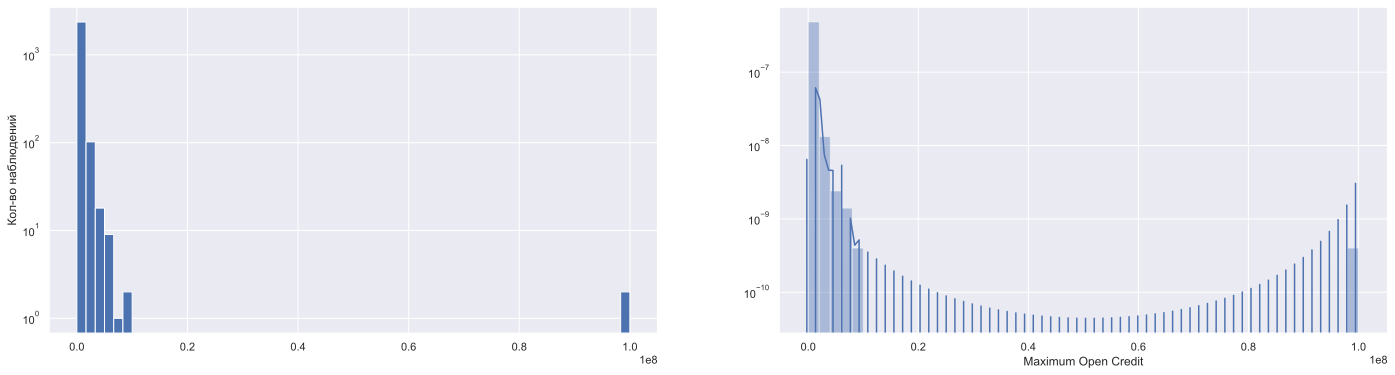

In [34]:
hists_descr(test_df['Maximum Open Credit'], log_y = True)

Снова аномалия,это выбросы в Current Loan Amount, тогда оставшиеся заменим на Current Credit Balance

In [35]:
test_df.loc[test_df['Maximum Open Credit'] > 9000000, 'Maximum Open Credit'] = \
test_df.loc[test_df['Maximum Open Credit'] > 9000000, 'Current Credit Balance']

Смотрим на распределение

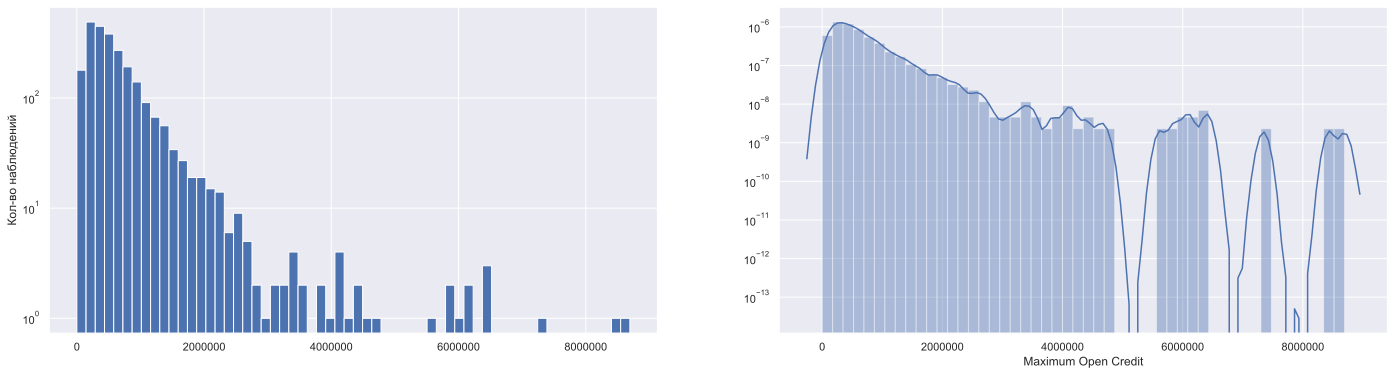

In [36]:
hists_descr(test_df['Maximum Open Credit'], log_y = True)

Пока будем считать, что такое распредеделение величины нас устраивает

### Months since last delinquent

In [37]:
test_df['Months since last delinquent'].isnull().value_counts()

True     1358
False    1142
Name: Months since last delinquent, dtype: int64

Я не знаю что делать с этим признаком,подчти половина значений пропущенно и он слишком привязан к ситуации конкретного объекта.У меня нет идей как искуственно заменить его. Пока решаю не использовать его при построении модели.

In [38]:
test_df.drop('Months since last delinquent', axis = 1, inplace=True)

### Bankruptcies

In [39]:
test_df['Bankruptcies'].isnull().value_counts()

False    2497
True        3
Name: Bankruptcies, dtype: int64

Можно заморочиться и заполнить пропуски в зависимости от других признаков, но их мало и я склоняюсь к замене на нулевую моду.

In [40]:
test_df['Bankruptcies'].mode()[0]

0.0

In [41]:
test_df['Bankruptcies'].fillna(0, inplace=True)

### Current Loan Amount

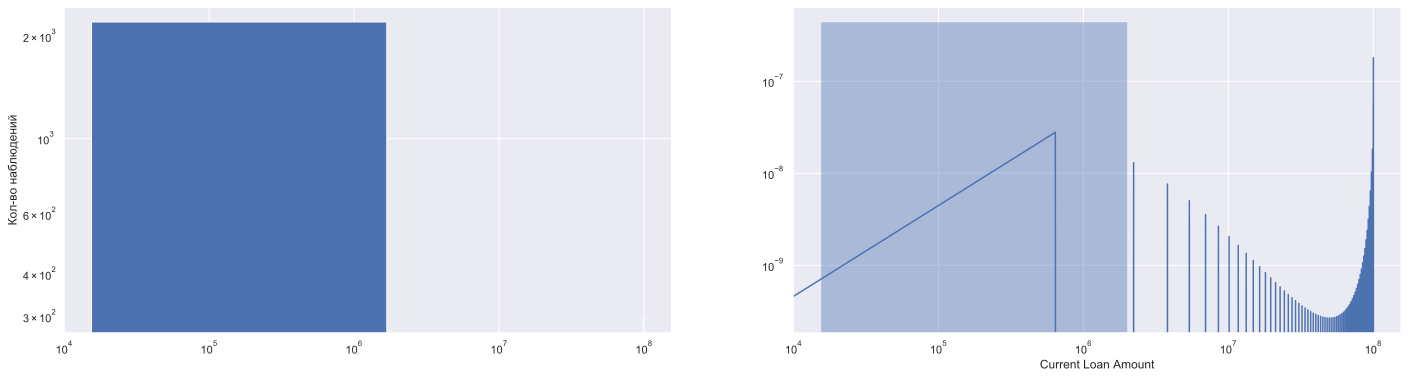

In [42]:
hists_descr(test_df['Current Loan Amount'],log_x=True, log_y=True)

In [43]:
test_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Id
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000,2500.00000
mean,1.313588e+06,0.035200,11.184400,18.325920,6.597986e+05,0.162000,0.106800,1.215572e+07,2.963966e+05,18271.340000,1234.516860,1249.50000
std,7.039899e+05,0.386291,4.852774,7.254659,6.950513e+05,0.559894,0.356994,3.226097e+07,3.783020e+05,11543.881469,1740.219442,721.83216
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000,0.00000
25%,9.362250e+05,0.000000,8.000000,13.400000,2.795265e+05,0.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000,624.75000
50%,1.181857e+06,0.000000,10.000000,17.000000,4.794460e+05,0.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000,1249.50000
75%,1.494644e+06,0.000000,14.000000,22.100000,7.977475e+05,0.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000,1874.25000
max,9.163985e+06,15.000000,48.000000,53.400000,8.693828e+06,15.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000,2499.00000


In [44]:
# len(test_df[test_df['Current Loan Amount'] >= 99999999]) - 297 значений
test_df[test_df['Current Loan Amount'] >= 99999999]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Id
17,Home Mortgage,1246495.0,9 years,0.0,10.0,22.9,357456.0,0.0,0.0,debt consolidation,Short Term,99999999.0,294823.0,21086.0,729.0,17
22,Own Home,960735.0,8 years,0.0,17.0,11.8,512380.0,0.0,0.0,debt consolidation,Short Term,99999999.0,164179.0,17133.0,733.0,22
33,Rent,743888.0,1 year,0.0,11.0,20.0,927124.0,0.0,0.0,debt consolidation,Short Term,99999999.0,303468.0,15002.0,735.0,33
45,Home Mortgage,1768729.0,10+ years,0.0,11.0,19.7,3462558.0,0.0,0.0,debt consolidation,Short Term,99999999.0,1764321.0,29184.0,737.0,45
59,Rent,1984512.0,5 years,0.0,11.0,10.5,286088.0,0.0,0.0,debt consolidation,Short Term,99999999.0,134653.0,25964.0,745.0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,Rent,5997920.0,2 years,0.0,11.0,17.6,1178584.0,0.0,0.0,debt consolidation,Short Term,99999999.0,350151.0,39686.0,750.0,2444
2457,Home Mortgage,1437502.0,10+ years,0.0,16.0,13.0,750970.0,1.0,1.0,debt consolidation,Short Term,99999999.0,71991.0,25396.0,747.0,2457
2461,Rent,613225.0,3 years,0.0,6.0,16.8,188078.0,0.0,0.0,other,Short Term,99999999.0,13319.0,7665.0,749.0,2461
2467,Home Mortgage,939075.0,4 years,0.0,21.0,16.7,577940.0,0.0,0.0,debt consolidation,Short Term,99999999.0,269534.0,17216.0,737.0,2467


Попробую заменить на Maximum Open Credit

In [45]:
test_df.loc[test_df['Current Loan Amount'] >=99999999, 'Current Loan Amount' ] = \
test_df.loc[test_df['Current Loan Amount'] >=99999999, 'Maximum Open Credit']

Посмотрим, что получилось

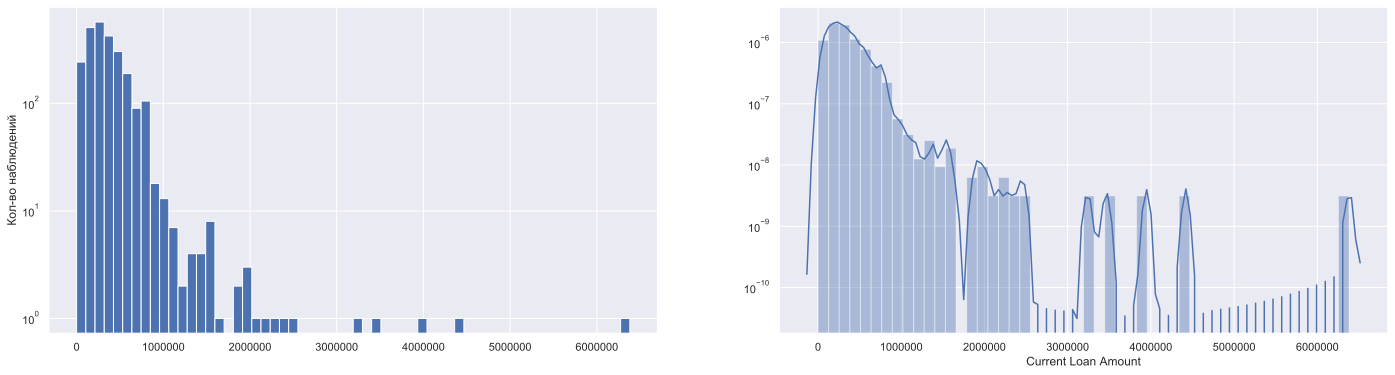

In [46]:
hists_descr(test_df['Current Loan Amount'], log_y=True)

Распределение стало похожим на Maximum Open Credit, что неудивительно, ведь я искуственно увеличил корреляцию между этими признаками путем взаимной подмены значений.В дальнейшем посмотрим на матрицу корреляций.

### Current Credit Balance

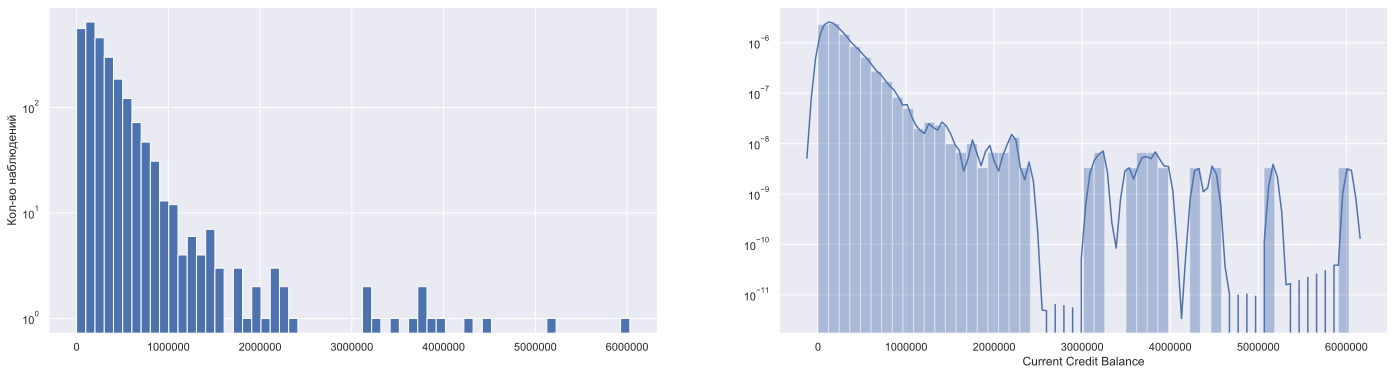

In [47]:
hists_descr(test_df['Current Credit Balance'], log_y=True)

Ну, допустим

### Monthly Debt

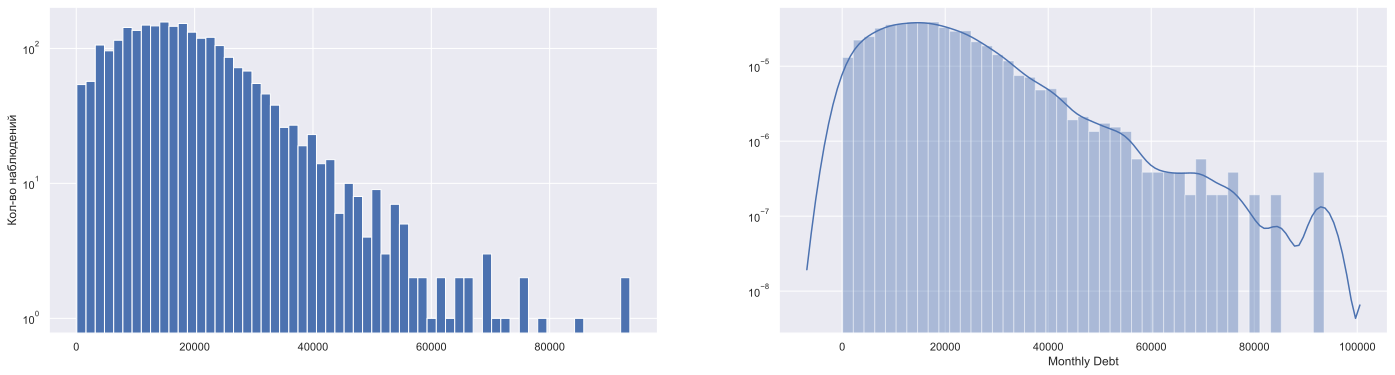

In [48]:
hists_descr(test_df['Monthly Debt'], log_y=True)

### Credit Score

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             2500 non-null   object 
 1   Annual Income              2500 non-null   float64
 2   Years in current job       2414 non-null   object 
 3   Tax Liens                  2500 non-null   float64
 4   Number of Open Accounts    2500 non-null   float64
 5   Years of Credit History    2500 non-null   float64
 6   Maximum Open Credit        2500 non-null   float64
 7   Number of Credit Problems  2500 non-null   float64
 8   Bankruptcies               2500 non-null   float64
 9   Purpose                    2500 non-null   object 
 10  Term                       2500 non-null   object 
 11  Current Loan Amount        2500 non-null   float64
 12  Current Credit Balance     2500 non-null   float64
 13  Monthly Debt               2500 non-null   float

In [50]:
test_df['Credit Score'].isnull().value_counts()

False    1987
True      513
Name: Credit Score, dtype: int64

In [51]:
test_df[test_df['Credit Score'] > 1000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Id
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0,2
12,Home Mortgage,1054614.0,2 years,0.0,11.0,14.0,306328.0,0.0,0.0,debt consolidation,Short Term,155408.0,202388.0,14940.0,7030.0,12
41,Home Mortgage,1735498.0,1 year,0.0,10.0,13.2,1584506.0,0.0,0.0,debt consolidation,Short Term,777172.0,758119.0,30371.0,7320.0,41
54,Home Mortgage,1602403.0,9 years,0.0,13.0,18.9,690514.0,0.0,0.0,home improvements,Long Term,695266.0,365560.0,16959.0,6340.0,54
58,Home Mortgage,1238895.0,6 years,0.0,22.0,17.5,939378.0,0.0,0.0,debt consolidation,Short Term,393866.0,499757.0,26017.0,7140.0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,Home Mortgage,1030902.0,10+ years,0.0,14.0,25.8,871838.0,0.0,0.0,debt consolidation,Long Term,533346.0,430692.0,27319.0,7300.0,2449
2470,Home Mortgage,1116972.0,8 years,0.0,8.0,14.0,351560.0,0.0,0.0,debt consolidation,Long Term,258676.0,239552.0,14521.0,6470.0,2470
2472,Home Mortgage,1951110.0,< 1 year,0.0,13.0,24.1,440506.0,1.0,1.0,debt consolidation,Short Term,129096.0,92454.0,25852.0,7410.0,2472
2477,Rent,667603.0,2 years,0.0,5.0,12.3,333366.0,0.0,0.0,debt consolidation,Short Term,220858.0,152589.0,7622.0,7480.0,2477


Допущу, что тут просто ошибка в значениях. Исправим

In [52]:
score_list = test_df['Credit Score'].to_list()
credit_list = []
for i in score_list:
    if i > 1000:
        i = i / 10
        credit_list.append(i)
    else:
        credit_list.append(i)
len(score_list), len(credit_list) 

(2500, 2500)

In [53]:
test_df.drop('Credit Score', axis = 1, inplace=True)
test_df['Credit Score'] = credit_list

Также имеются пропущенные значения. Заполним их медианой(среднее значение Credit Score для Американцев равно 723, медиана в нашем датасете равна 727)

In [54]:
test_df['Credit Score'] = test_df['Credit Score'].fillna(test_df['Credit Score'].median())

In [55]:
test_df['Credit Score'].isnull().value_counts()

False    2500
Name: Credit Score, dtype: int64

Все аномальные значения исправлены, все пропуски заполнены. Посмотрим на распределение

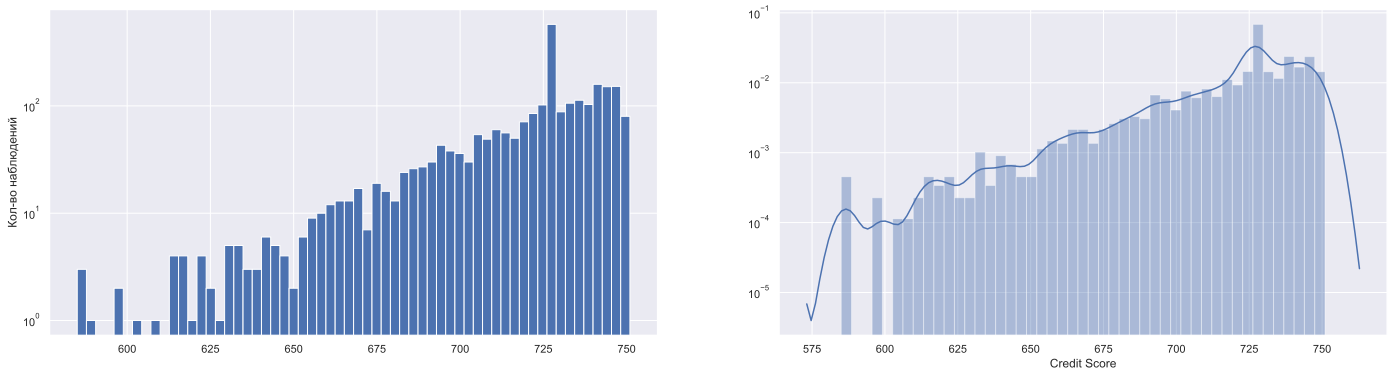

In [56]:
hists_descr(test_df['Credit Score'], log_y=True)

## Категориальные данные

### Home Owner

In [57]:
test_df['Home Ownership'].isnull().value_counts() # пропусков нет
test_df['Home Ownership'].value_counts()

Home Mortgage    1225
Rent             1020
Own Home          248
Have Mortgage       7
Name: Home Ownership, dtype: int64

### Years in current job

In [58]:
test_df['Years in current job'].isnull().value_counts()

False    2414
True       86
Name: Years in current job, dtype: int64

In [59]:
test_df['Years in current job'].mode()

0    10+ years
dtype: object

Заполним пропуски модой

In [60]:
test_df['Years in current job'].fillna('10+ years', inplace=True)

### Purpose

In [61]:
test_df['Purpose'].value_counts()

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
vacation                   3
educational expenses       3
wedding                    2
moving                     1
Name: Purpose, dtype: int64

### Term

In [62]:
test_df['Term'].value_counts()

Short Term    1861
Long Term      639
Name: Term, dtype: int64

Пропусков нет

### Посмотрим на корреляционную матрицу

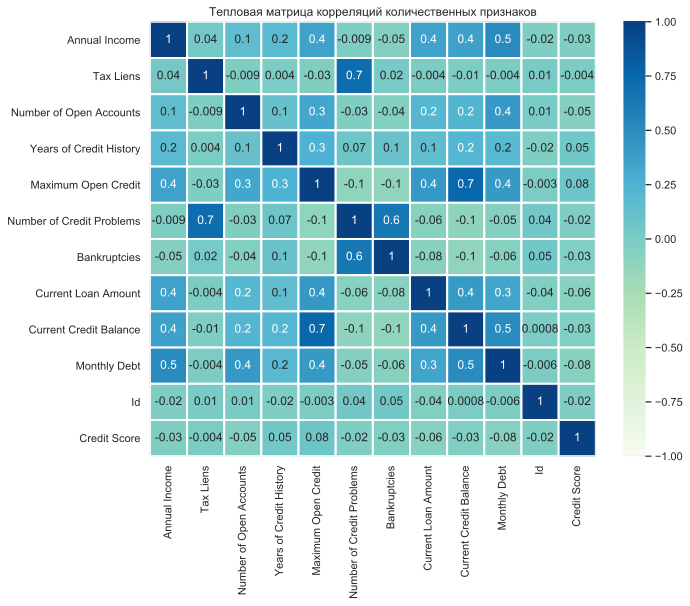

In [63]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(test_df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=2, cmap='GnBu')
plt.title('Тепловая матрица корреляций количественных признаков')
plt.show()

## Преобразование категориальных данных в бинарные

In [67]:
colls = test_df.select_dtypes('object').columns.to_list()
test_final = pd.get_dummies(test_df,columns = colls)
test_final.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,1181857.0,0.0,9.0,12.5,220968.0,0.0,0.0,162470.0,105906.0,6813.0,...,0,0,0,0,0,0,0,0,0,1
1,231838.0,0.0,6.0,32.7,55946.0,0.0,0.0,78298.0,46037.0,2318.0,...,0,0,0,0,0,0,0,0,0,1
2,1152540.0,0.0,10.0,13.7,204600.0,0.0,0.0,200178.0,146490.0,18729.0,...,0,0,0,0,0,0,0,0,0,1
3,1220313.0,0.0,16.0,17.0,456302.0,0.0,0.0,217382.0,213199.0,27559.0,...,0,0,0,0,0,0,0,0,0,1
4,2340952.0,0.0,11.0,23.6,1207272.0,0.0,0.0,777634.0,425391.0,42605.0,...,0,0,0,0,0,0,0,0,1,0


## Приведение типов

In [68]:
dig_colls = ['Annual Income','Tax Liens','Number of Open Accounts','Years of Credit History',
         'Maximum Open Credit','Number of Credit Problems','Bankruptcies','Current Loan Amount',
        'Current Credit Balance','Monthly Debt','Credit Score']
for dig_col in dig_colls:
    test_final[dig_col] = test_final[dig_col].astype('int64')

"""cat_colls = train_final.select_dtypes('uint8').columns.to_list()
for cat_col in cat_colls:
    train_final[cat_col] = train_final[cat_col].astype('str')"""


"cat_colls = train_final.select_dtypes('uint8').columns.to_list()\nfor cat_col in cat_colls:\n    train_final[cat_col] = train_final[cat_col].astype('str')"

In [70]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Annual Income                   2500 non-null   int64
 1   Tax Liens                       2500 non-null   int64
 2   Number of Open Accounts         2500 non-null   int64
 3   Years of Credit History         2500 non-null   int64
 4   Maximum Open Credit             2500 non-null   int64
 5   Number of Credit Problems       2500 non-null   int64
 6   Bankruptcies                    2500 non-null   int64
 7   Current Loan Amount             2500 non-null   int64
 8   Current Credit Balance          2500 non-null   int64
 9   Monthly Debt                    2500 non-null   int64
 10  Id                              2500 non-null   int64
 11  Credit Score                    2500 non-null   int64
 12  Home Ownership_Have Mortgage    2500 non-null   uint8
 13  Hom

### Имеем подготовленный тестовый датасет test_final

In [73]:
test_final.head(10)

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,1181857,0,9,12,220968,0,0,162470,105906,6813,...,0,0,0,0,0,0,0,0,0,1
1,231838,0,6,32,55946,0,0,78298,46037,2318,...,0,0,0,0,0,0,0,0,0,1
2,1152540,0,10,13,204600,0,0,200178,146490,18729,...,0,0,0,0,0,0,0,0,0,1
3,1220313,0,16,17,456302,0,0,217382,213199,27559,...,0,0,0,0,0,0,0,0,0,1
4,2340952,0,11,23,1207272,0,0,777634,425391,42605,...,0,0,0,0,0,0,0,0,1,0
5,922583,0,26,17,713174,0,0,94028,135508,11148,...,0,0,0,0,0,0,0,0,0,1
6,1233309,0,7,22,376420,0,0,454388,292904,8181,...,0,0,0,0,0,0,0,0,0,1
7,1215867,0,13,12,195888,0,0,407726,120099,7599,...,0,0,0,0,0,0,0,0,0,1
8,1265932,0,8,9,370524,0,0,131956,237747,10112,...,1,0,0,0,0,0,0,0,0,1
9,2140445,1,15,16,867680,1,0,391336,294500,18372,...,0,0,0,0,0,0,0,0,0,1
